## The Idea Behind the Metric
    -The more hospitals in a given neighborhood means more care access to an individual. The more care access there is, the more likely the citizens of that neighborhood will be in good health.

## How it is measured?
    - We first will look at the lattitude and logitude of a given hospital. Using "fpsnippets" we will estimate the lattitude and longitude to a neighborhood location. We will then create a dictionary of neighborhoods as the key and adding a value to the key everytime a hospital is located in that neighborhood. We will then create a bar graph using neighborhoods as the "x" value and the number of hospitals as the "y" value to represent my data.

In [5]:
import fpsnippets as fp
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
raw_hospitals = pd.read_csv("data-hospitallocations.csv")

neighborhoods = dict()
i = 0

while i < len(raw_hospitals):
    
    neighborhood_name = fp.geo_to_neighborhood(raw_hospitals.at[i, 'Y'], raw_hospitals.at[i, 'X'])
    
    if neighborhood_name in neighborhoods:
        neighborhoods[neighborhood_name] = neighborhoods[neighborhood_name] + 1
        
    else:
        neighborhoods[neighborhood_name] = 1
        
    i+=1
    
print(neighborhoods)

{'Central Lawrenceville': 1, 'South Oakland': 1, None: 14, 'Bluff': 1, 'West Oakland': 1, 'Shadyside': 1, 'Lincoln-Lemington-Belmar': 1, 'Central Northside': 1, 'Bloomfield': 1, 'North Oakland': 1}


I created a dictionary that used the neighborhood name as the key and the number of hospitals in that neighborhood as values. I found that a lot of hospitals were located outside the Pittsburgh vicinity, more so around Allegheny County (which aren't counted)

In [7]:
hospitals = pd.DataFrame(
    {
        'hoods' : neighborhoods.keys(),
        '# of hospitals' : neighborhoods.values()
    }
)

display(hospitals)

,hoods,# of hospitals
0,Central Lawrenceville,1
1,South Oakland,1
2,None,14
3,Bluff,1
4,West Oakland,1
5,Shadyside,1
6,Lincoln-Lemington-Belmar,1
7,Central Northside,1
8,Bloomfield,1
9,North Oakland,1


I converted the dictionary into a pandas data frame.

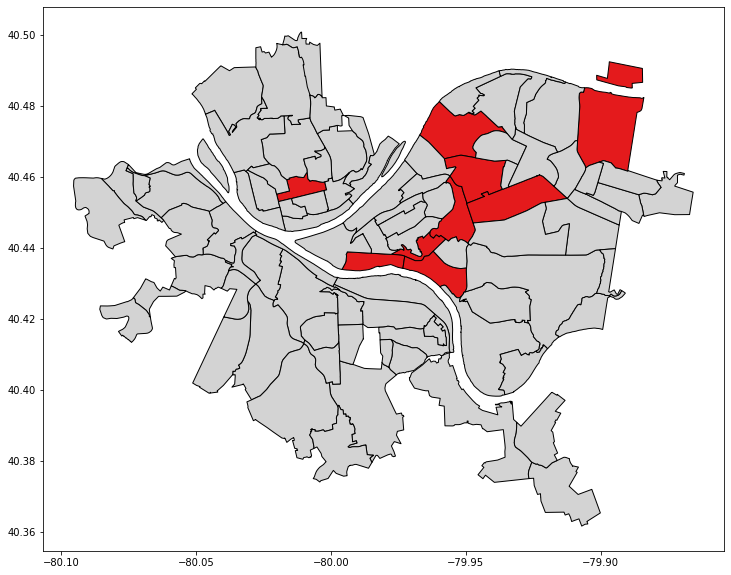

In [9]:
neighborhoods_list = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
hospitals_map = neighborhoods_list.merge(hospitals, how='left', left_on='hood', right_on='hoods')
hospitals_map.plot(column='# of hospitals', # set the data to be used for coloring
               cmap='Set1',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend_kwds={'label': "Hospitals in Pittsburgh"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

This map highlights the neighborhoods in Pittsburgh that have a hospital in them. Only 1 hospital was found in each neighborhood. Even though there are not many hospitals, the data can still be used in combination with the other data to determine the "healthiest" neighborhood. These neighborhoods with h